# PHY480/905 Semester Project Template

**INSTRUCTIONS**: This is a template to help organize your project.  All projects must include the 5 major sections below (you do not need to use this template file).  Complete your work below and remove content in parentheses. 

#### PHY 480/905 Semester Project
### &#9989; Michael Daum
#### &#9989; 4/15/24

# ___Propagation of Waves Through Different Systems of Media in Python___

##  introduction 

_(Provide context for the problem: Background and Motivation.  **Clearly state the question(s) you set
out to answer.**)_

## Methodology

_(How did you go about answering your question(s)? Most of your code will be
contained in this section.)_

In [4]:
### Code base from the em-waves python package's waves.py
### Initial code does not support more than one material, so majority have changes have been made to implement multiple materials

U_1 := σ_1/(ω*ε_0*ε_r_1) = 0  ==> medium 1 is a(n) Insulator
U_2 := σ_2/(ω*ε_0*ε_r_2) = 1.432e-11  ==> medium 2 is a(n) Insulator
μ_eq_1 = 1.257e-06
μ_eq_2 = 3.77e-06
ε_eq_1 = 8.854e-12+0j
ε_eq_2 = 4.427e-11-7.162e-11j
ζ_eq_1 = 376.7+0j
ζ_eq_2 = 184.8+103j
k_1 = 37.73+0j
k_2 = 176-98.12j
Γ_e = -0.2981+0.2382j = 0.3815 ∠ 2.467
τ_e = 0.7019+0.2382j = 0.7413 ∠ 0.3271
δ = 0.01019
S_i = 0.1327
S_t = 0.1134 = 85.44% S_i


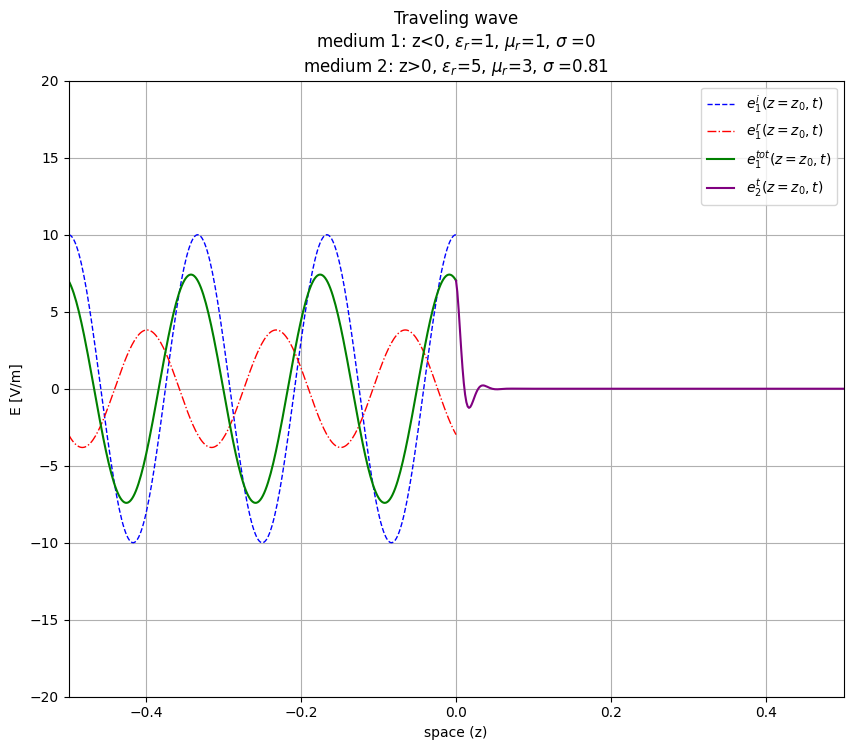

In [1]:
from original import Sine, Medium
import matplotlib.pyplot as plt

f_0     = 1.8e9 # [Hz]
E_0     = 10.0  # [V/m]

wave = Sine(f=f_0, A=E_0)
# wave = Gaussian(rms=1.3)
# wave = Rect(width=4)

free_space = Medium(1,1,0)
medium2 = Medium(5,3,.81)

wave.add_mediums(medium1=free_space, medium2=medium2)
wave.print_data()
wave.show()

U_1 := σ_1/(ω*ε_0*ε_r_1) = 0  ==> medium 1 is a(n) Insulator
U_2 := σ_2/(ω*ε_0*ε_r_2) = 1.432e-11  ==> medium 2 is a(n) Insulator
μ_eq_1 = 1.257e-06
μ_eq_2 = 3.77e-06
ε_eq_1 = 8.854e-12+0j
ε_eq_2 = 4.427e-11-7.162e-11j
ζ_eq_1 = 376.7+0j
ζ_eq_2 = 184.8+103j
k_1 = 37.73+0j
k_2 = 176-98.12j
Γ_e for mediums 1 and 2 = -0.2981+0.2382j = 0.3815 ∠ 2.467
τ_e for mediums 1 and 2 = 0.7019+0.2382j = 0.7413 ∠ 0.3271
δ for medium 2 = 0.01019
S_1 = 0.1327
S_2 = 0.1134 = 85.44% S_1


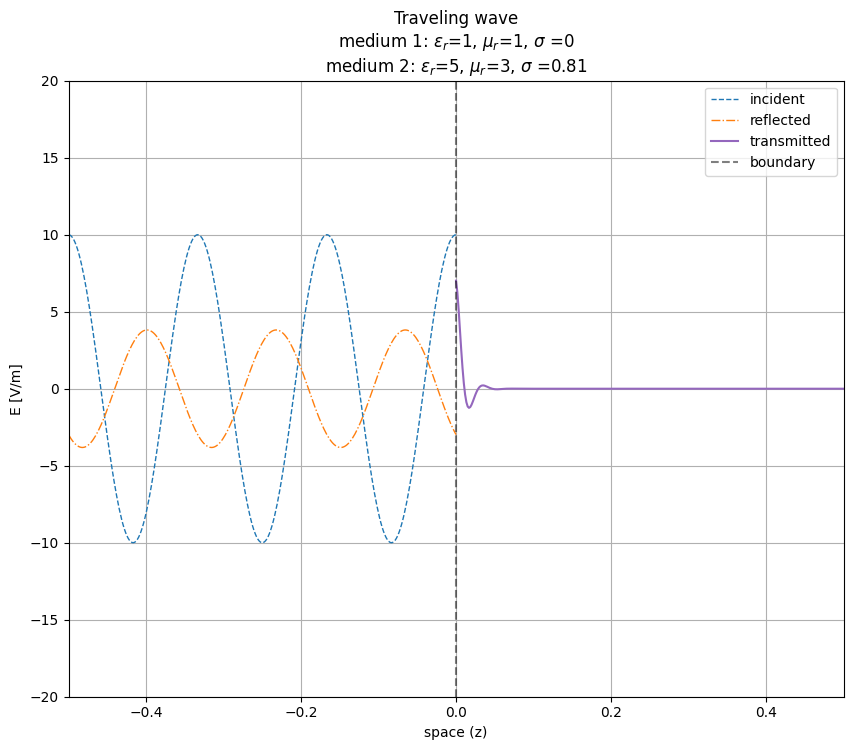

In [2]:
from waves import Sine, Medium

f_0     = 1.8e9 # [Hz]
E_0     = 10.0  # [V/m]

# wave = Gaussian(rms=1.3)
# wave = Rect(width=4)

free_space = Medium(1,1,0)
medium2 = Medium(5,3,.81)
wave = Sine(mediums = [medium2], f=f_0, A=E_0)

#wave.add_mediums(medium1=free_space, medium2=medium2)
wave.print_data()
wave.show()

U_1 := σ_1/(ω*ε_0*ε_r_1) = 0  ==> medium 1 is a(n) Insulator
U_2 := σ_2/(ω*ε_0*ε_r_2) = 0  ==> medium 2 is a(n) Insulator
U_3 := σ_3/(ω*ε_0*ε_r_3) = 0  ==> medium 3 is a(n) Insulator
μ_eq_1 = 1.257e-06
μ_eq_2 = 1.257e-06
μ_eq_3 = 1.257e-06
ε_eq_1 = 8.854e-12+0j
ε_eq_2 = 1.771e-11+0j
ε_eq_3 = 8.854e-12+0j
ζ_eq_1 = 376.7+0j
ζ_eq_2 = 266.4+0j
ζ_eq_3 = 376.7+0j
k_1 = 37.73+0j
k_2 = 53.35+0j
k_3 = 37.73+0j
Γ_e for mediums 1 and 2 = -0.1716+0j = 0.1716 ∠ 3.142
Γ_e for mediums 2 and 3 = 0.1716+0j = 0.1716 ∠ 0
τ_e for mediums 1 and 2 = 0.8284+0j = 0.8284 ∠ 0
τ_e for mediums 2 and 3 = 1.172+0j = 1.172 ∠ 0
δ for medium 2 = inf
δ for medium 3 = inf
S_1 = 0.1327
S_2 = 0.1288 = 97.06% S_1
S_3 = 0.1822 = 97.06% S_2


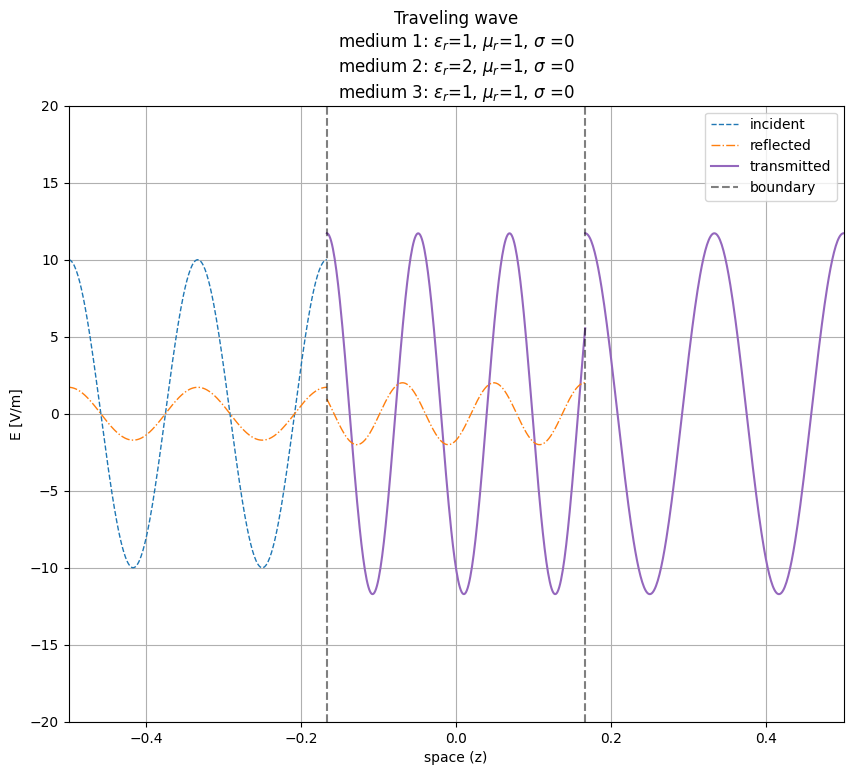

In [3]:
free_space = Medium(1,1,0)
medium2 = Medium(2,1,0)
medium3 = Medium(1,1,0)
wave = Sine(mediums = [free_space,medium2,medium3], f=f_0, A=E_0)

#wave.add_mediums(medium1=free_space, medium2=medium2)
wave.print_data()
wave.show()

U_1 := σ_1/(ω*ε_0*ε_r_1) = 0  ==> medium 1 is a(n) Insulator
U_2 := σ_2/(ω*ε_0*ε_r_2) = 1.432e-11  ==> medium 2 is a(n) Insulator
U_3 := σ_3/(ω*ε_0*ε_r_3) = 0  ==> medium 3 is a(n) Insulator
μ_eq_1 = 1.257e-06
μ_eq_2 = 3.77e-06
μ_eq_3 = 1.257e-06
ε_eq_1 = 8.854e-12+0j
ε_eq_2 = 4.427e-11-7.162e-11j
ε_eq_3 = 8.854e-12+0j
ζ_eq_1 = 376.7+0j
ζ_eq_2 = 184.8+103j
ζ_eq_3 = 376.7+0j
k_1 = 37.73+0j
k_2 = 176-98.12j
k_3 = 37.73+0j
Γ_e for mediums 1 and 2 = -0.2981+0.2382j = 0.3815 ∠ 2.467
Γ_e for mediums 2 and 3 = 0.2981-0.2382j = 0.3815 ∠ -0.6742
τ_e for mediums 1 and 2 = 0.7019+0.2382j = 0.7413 ∠ 0.3271
τ_e for mediums 2 and 3 = 1.298-0.2382j = 1.32 ∠ -0.1815
δ for medium 2 = 0.01019
δ for medium 3 = inf
S_1 = 0.1327
S_2 = 0.1134 = 85.44% S_1
S_3 = 0.2019 = 85.44% S_2


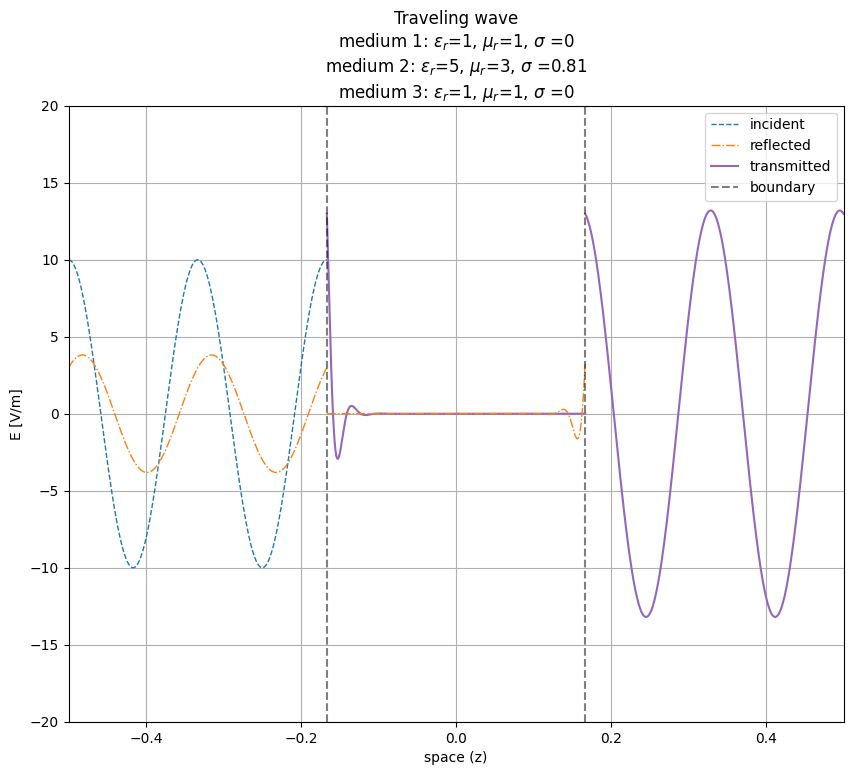

In [4]:
free_space = Medium(1,1,0)
medium2 = Medium(5,3,.81)
medium3 = Medium(1,1,0)
wave = Sine(mediums = [free_space,medium2,medium3], f=f_0, A=E_0)

#wave.add_mediums(medium1=free_space, medium2=medium2)
wave.print_data()
wave.show()

## Results and Discussion

_(What did you find when you carried out your methods? Some of your code related to presenting results/figures/data may be replicated from the methods section or may only be present in
this section.
All of the plots that you plan on using for your presentation should be present in this section)_

##  Conclusion and Perspectives

_(What did you learn from your results? What obstacles did you run into? What would you do differently next time? Clearly provide quantitative answers to your question(s)?  At least one of your questions should be answered with numbers.  That is, it is not sufficient to answer "yes" or "no", but rather to say something quantitative such as variable 1 increased roughly 10% for every 1 year increase in variable 2.)_

## References

_(List the source(s) for any data and/or literature cited in your project.  Ideally, this should be formatted using a formal citation format (MLA or APA or other, your choice!).   
Multiple free online citation generators are available such as <a href="http://www.easybib.com/style">http://www.easybib.com/style</a>. 
**Important:** if you use **any** code that you find on the internet for your project you **must** cite it or you risk losing most/all of the points for you project.)_

##  Appendices
